<h1> <b> Visualização e Comparação dos Resultados do PGC-NN Pytorch e Tensorflow no Dataset Alabama, Arizona. Onde foram testados  PGC-NN Pytorch com e sem as normalizações feitas pela camada ARMAConv.preprocessing da Spektral (Considerando que, na ARMAConv torch_geometric a normalização já está sendo feita de forma interna, resultando assim em uma dupla normalização)</b>
</h1>



#Imports e Unzip

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import numpy as np
from PIL import Image
from PIL import ImageDraw, ImageFont


#Funções utilizadas

In [9]:
def fazer_histograma(df1,df2,descricao1,descricao2):
  plt.hist(df1, alpha=0.5, label=descricao1)
  plt.hist(df2, alpha=0.5, label=descricao2)
  plt.xlabel('Valores')
  plt.ylabel('Frequência')
  plt.title('Histograma dos Dados')
  plt.legend(loc='upper right')
  plt.show()




def plot_performance_histogram(lists_of_dicts1, lists_of_dicts2, dataset1, versao1="Pytorch", versao2="Tensorflow"):
    def compute_means(lists_of_dicts):
        precision_means = []
        recall_means = []
        fscore_means = []

        for i in range(len(lists_of_dicts)):
            precision_dict = lists_of_dicts[i][0]
            recall_dict = lists_of_dicts[i][1]
            fscore_dict = lists_of_dicts[i][2]

            precision_mean = np.mean(list(precision_dict.values()))
            recall_mean = np.mean(list(recall_dict.values()))
            fscore_mean = np.mean(list(fscore_dict.values()))

            precision_means.append(precision_mean)
            recall_means.append(recall_mean)
            fscore_means.append(fscore_mean)

        total_precision_mean = np.mean(precision_means)
        total_recall_mean = np.mean(recall_means)
        total_fscore_mean = np.mean(fscore_means)

        return total_precision_mean, total_recall_mean, total_fscore_mean

    means1 = compute_means(lists_of_dicts1)
    means2 = compute_means(lists_of_dicts2)

    metrics = ['precisão', 'recall', 'fscore']
    values1 = list(means1)
    values2 = list(means2)
    colors1 = ['blue', 'blue', 'blue']
    colors2 = ['red', 'red', 'red']
    bar_width = 0.15
    x = np.arange(len(metrics))

    plt.figure(figsize=(12, 7))

    bars1 = plt.bar(x - bar_width/2, values1, bar_width, label=f'Desempenho Médio Geral {dataset1} - {versao1}', color=colors1)
    bars2 = plt.bar(x + bar_width/2, values2, bar_width, label=f'Desempenho Médio Geral {dataset1} - {versao2}', color=colors2)

    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.title(f'Histograma Desempenho Geral')
    plt.xlabel('Métricas')
    plt.ylabel('Valores Médios')
    plt.xticks(x, metrics)
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.ylim(0.0, 1.0)
    plt.legend()

    plt.tight_layout()
    plt.show()

def comparar_graficamente(dict1, dict2, descricao1, descricao2, tipo, casas_decimais=2):
    categorias = list(dict1.keys())
    valores_dict1 = list(dict1.values())
    valores_dict2 = list(dict2.values())

    posicoes = np.arange(len(categorias))

    largura_barra = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(posicoes - largura_barra/2, valores_dict1, width=largura_barra, label=descricao1, color='blue')
    plt.bar(posicoes + largura_barra/2, valores_dict2, width=largura_barra, label=descricao2, color='orange')

    plt.xlabel('Categorias')
    plt.ylabel('Valores')
    plt.title('Comparação métrica média ' + tipo + ':')
    plt.xticks(posicoes, categorias)
    plt.ylim(0.0, 1.0)
    plt.legend()

    for i, (valor1, valor2) in enumerate(zip(valores_dict1, valores_dict2)):
        plt.text(posicoes[i] - largura_barra/2, valor1 + 0.01, round(valor1, casas_decimais), ha='center', va='bottom')
        plt.text(posicoes[i] + largura_barra/2, valor2 + 0.01, round(valor2, casas_decimais), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()



def plotar_imagens(file1, file2):
    img1 = mpimg.imread(file1)
    img2 = mpimg.imread(file2)

    fig, axs = plt.subplots(1, 2, figsize=(20, 20))

    axs[0].imshow(img1)
    axs[0].axis('off')

    axs[1].imshow(img2)
    axs[1].axis('off')


    plt.show()


def plot_pie_chart(csv_file):
    df = pd.read_csv(csv_file)

    category_counts = df['category'].value_counts()

    labels = category_counts.index
    sizes = category_counts.values
    explode = (0.1, 0, 0, 0, 0, 0, 0)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')

    plt.title(f'Porcentagem de Locais por Categoria {csv_file.replace(".csv","").replace("checkins/","").title()}')

    plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def comparar_tabelas(file1, file2, title1, file3, file4, title2, file5, file6, title3, casas_decimais=2):
    def process_files(file1, file2, title, casas_decimais):
        df1 = pd.read_csv(file1)
        df2 = pd.read_csv(file2)

        df1 = df1 * 100
        df2 = df2 * 100
        df1 = df1.round(casas_decimais)
        df2 = df2.round(casas_decimais)

        df1_transposed = df1.T
        df2_transposed = df2.T

        df1_transposed.reset_index(inplace=True)
        df2_transposed.reset_index(inplace=True)

        df1_transposed.rename(columns={'index': f'{title}'}, inplace=True)
        df2_transposed.rename(columns={'index': f'{title}'}, inplace=True)
        num_folds = len(df1_transposed.columns) - 1
        fold_columns = [f'Fold {i+1}' for i in range(num_folds)]

        df2_transposed.columns = [f'{title}(%)'] + fold_columns
        df1_transposed.columns = [f'{title}(%)'] + fold_columns

        combined_df = pd.concat([df1_transposed, df2_transposed], axis=1)

        df1_transposed['Média Pytorch'] = df1_transposed.iloc[:, 1:].mean(axis=1).round(casas_decimais)
        df2_transposed['Média Tensorflow'] = df2_transposed.iloc[:, 1:].mean(axis=1).round(casas_decimais)

        df1_transposed['Média Pytorch'] = df1_transposed['Média Pytorch'].astype(str)
        df2_transposed['Média Tensorflow'] = df2_transposed['Média Tensorflow'].astype(str)

        media_pytorch_index = df1_transposed.columns.get_loc('Média Pytorch')
        media_tensorflow_index = df2_transposed.columns.get_loc('Média Tensorflow')

        for idx in range(len(df1_transposed)):
            std_dev_pytorch = df1_transposed.iloc[idx, 1:-1].std()
            df1_transposed.iloc[idx, media_pytorch_index] = f"{df1_transposed.iloc[idx, media_pytorch_index]} (±{std_dev_pytorch:.{casas_decimais}f})"

        for idx in range(len(df2_transposed)):
            std_dev_tensorflow = df2_transposed.iloc[idx, 1:-1].std()
            df2_transposed.iloc[idx, media_tensorflow_index] = f"{df2_transposed.iloc[idx, media_tensorflow_index]} (±{std_dev_tensorflow:.{casas_decimais}f})"

        df1_transposed.drop(columns=df1_transposed.columns[1:-1], inplace=True)
        df2_transposed.drop(columns=df2_transposed.columns[1:-1], inplace=True)
        df2_transposed = df2_transposed.iloc[:, -1:]

        combined_df = pd.concat([df1_transposed, df2_transposed], axis=1)

        return combined_df

    combined_dfs = [
        process_files(file1, file2, title1, casas_decimais),
        process_files(file3, file4, title2, casas_decimais),
        process_files(file5, file6, title3, casas_decimais)
    ]

    final_df = pd.concat(combined_dfs, axis=1)

    fig, ax = plt.subplots(figsize=(12, len(final_df) * 0.5))

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    num_cols_per_section = len(final_df.columns) // 3

    col_ranges = [
        range(0, num_cols_per_section),
        range(num_cols_per_section, 2 * num_cols_per_section),
        range(2 * num_cols_per_section, len(final_df.columns))
    ]

    for i, col_range in enumerate(col_ranges):
        table = ax.table(
            cellText=final_df.iloc[:, col_range].values,
            colLabels=final_df.iloc[:, col_range].columns,
            cellLoc='center',
            loc='center',
            colWidths=[0.2] * len(col_range),
            bbox=[0, -0.9 * i, 1, 1.1]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)
        for key, cell in table.get_celld().items():
            cell.set_text_props(fontweight='bold')
            if cell.get_text().get_text() == 'nan':
                cell.set_visible(False)

    plt.tight_layout()
    plt.show()


In [11]:
def calcular_medias_por_coluna(nome_arquivo):
    df = pd.read_csv(nome_arquivo)
    df = df.astype(float)

    medias = df.mean().tolist()

    rotulos_colunas = df.columns.tolist()

    medias_com_rotulos = dict(zip(rotulos_colunas, medias))

    return medias_com_rotulos




In [12]:
def retornar_linha_valor(nome_arquivo, linha):
    df = pd.read_csv(nome_arquivo)
    df = df.astype(float)

    valores_linha = df.iloc[linha].to_dict()

    return valores_linha


# Alabama

## Batch_Size: 2048


## Com a Normalização no Pytorch e Sem Normalização no Pytorch

<ipython-input-10-c6101420889a>:94: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


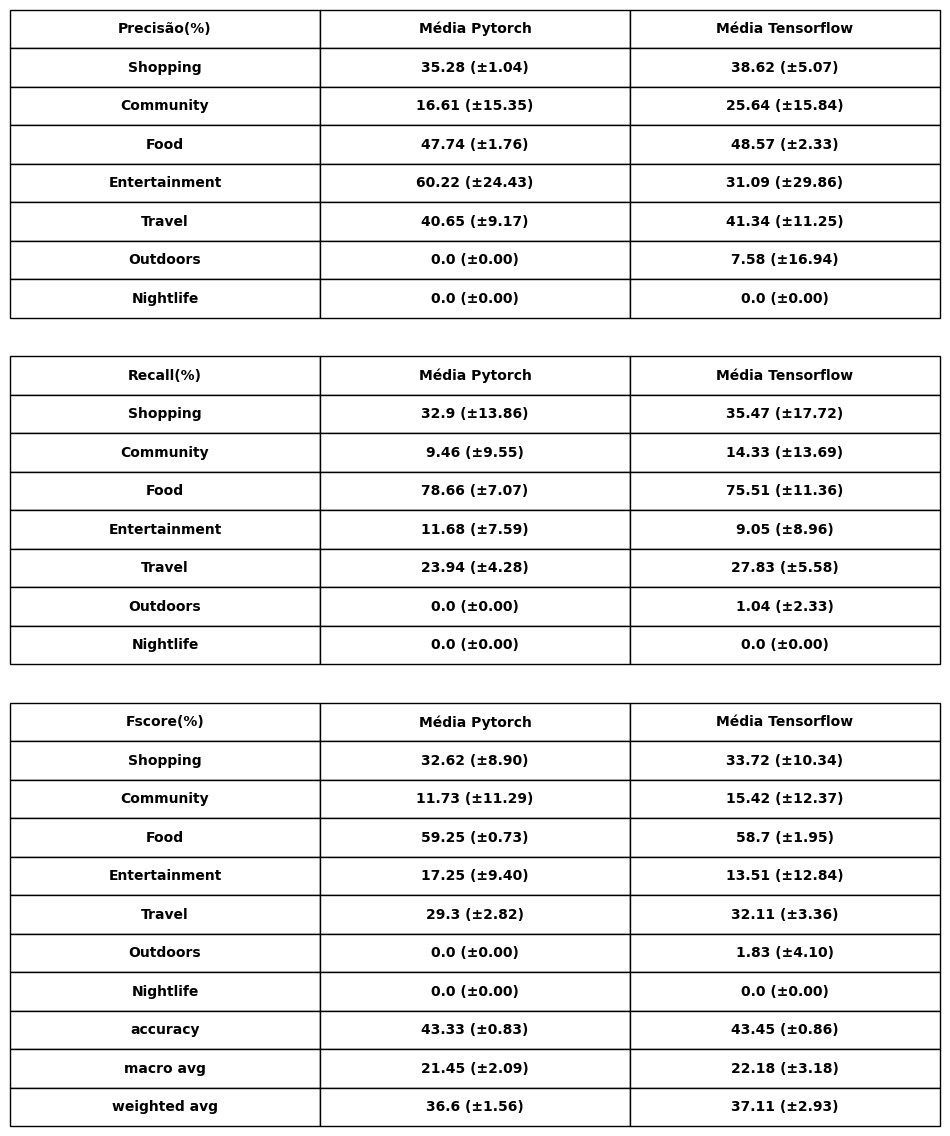

In [13]:
comparar_tabelas("Alabama/Com_Dupla_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Alabama/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Precisão","Alabama/Com_Dupla_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Alabama/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Recall","Alabama/Com_Dupla_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Alabama/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Fscore")

## Sem a Normalização no Pytorch e Tensorflow




<ipython-input-10-c6101420889a>:94: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


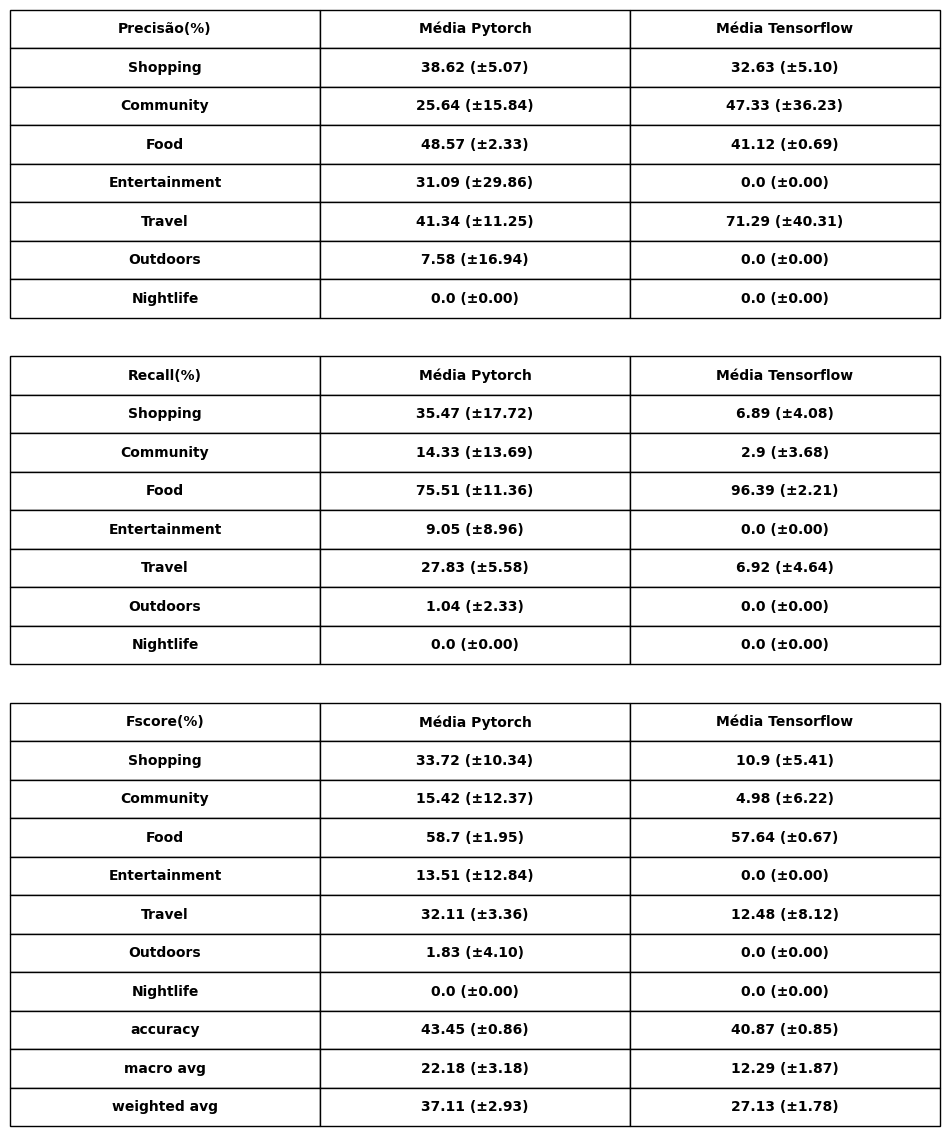

In [14]:
comparar_tabelas("Alabama/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Alabama/Tensorflow/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Precisão","Alabama/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Alabama/Tensorflow/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Recall","Alabama/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Alabama/Tensorflow/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Fscore")

# Arizona

## Batch_Size: 6144



## Com a Normalização no Pytorch e Sem Normalização no Pytorch

<ipython-input-10-c6101420889a>:94: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


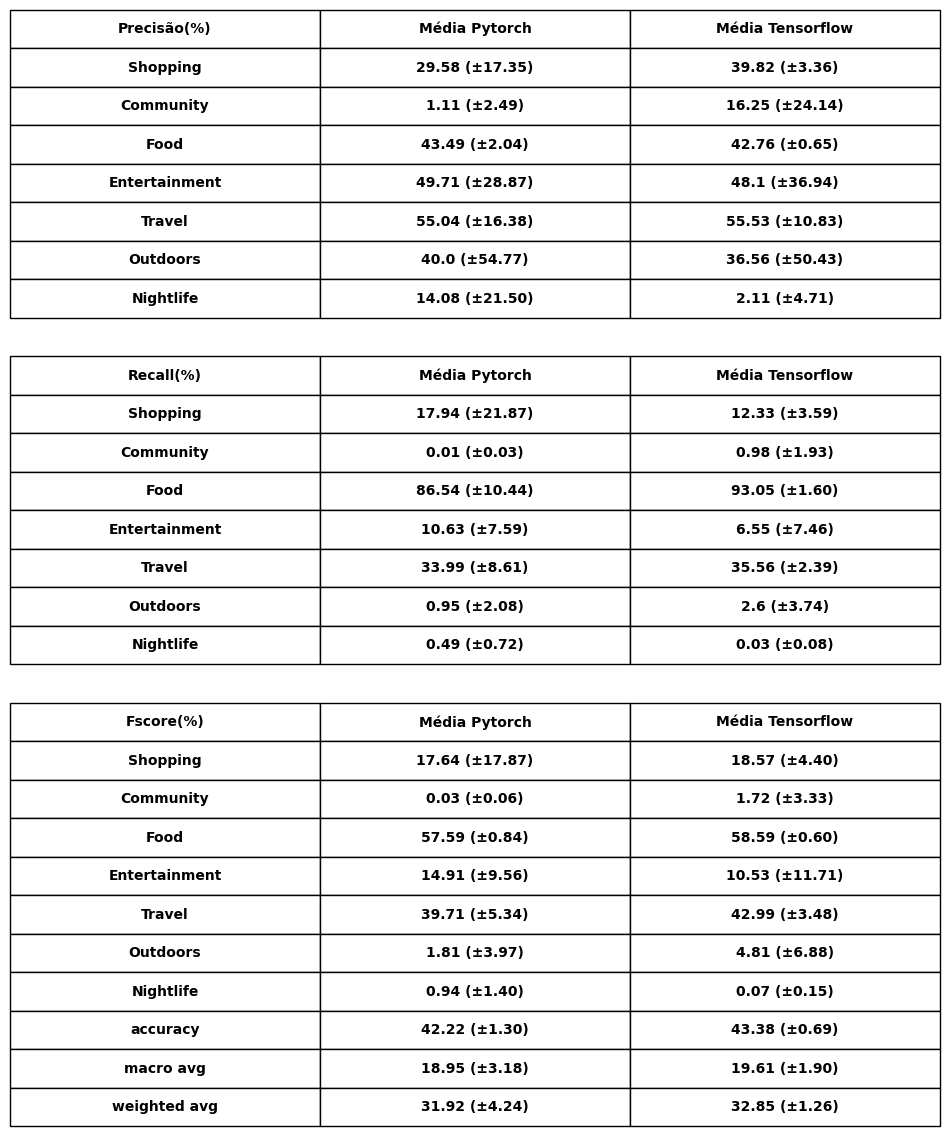

In [15]:
comparar_tabelas("Arizona/Com_Dupla_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Arizona/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Precisão","Arizona/Com_Dupla_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Arizona/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Recall","Arizona/Com_Dupla_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Arizona/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Fscore")

## Sem a Normalização e Tensorflow




<ipython-input-10-c6101420889a>:94: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


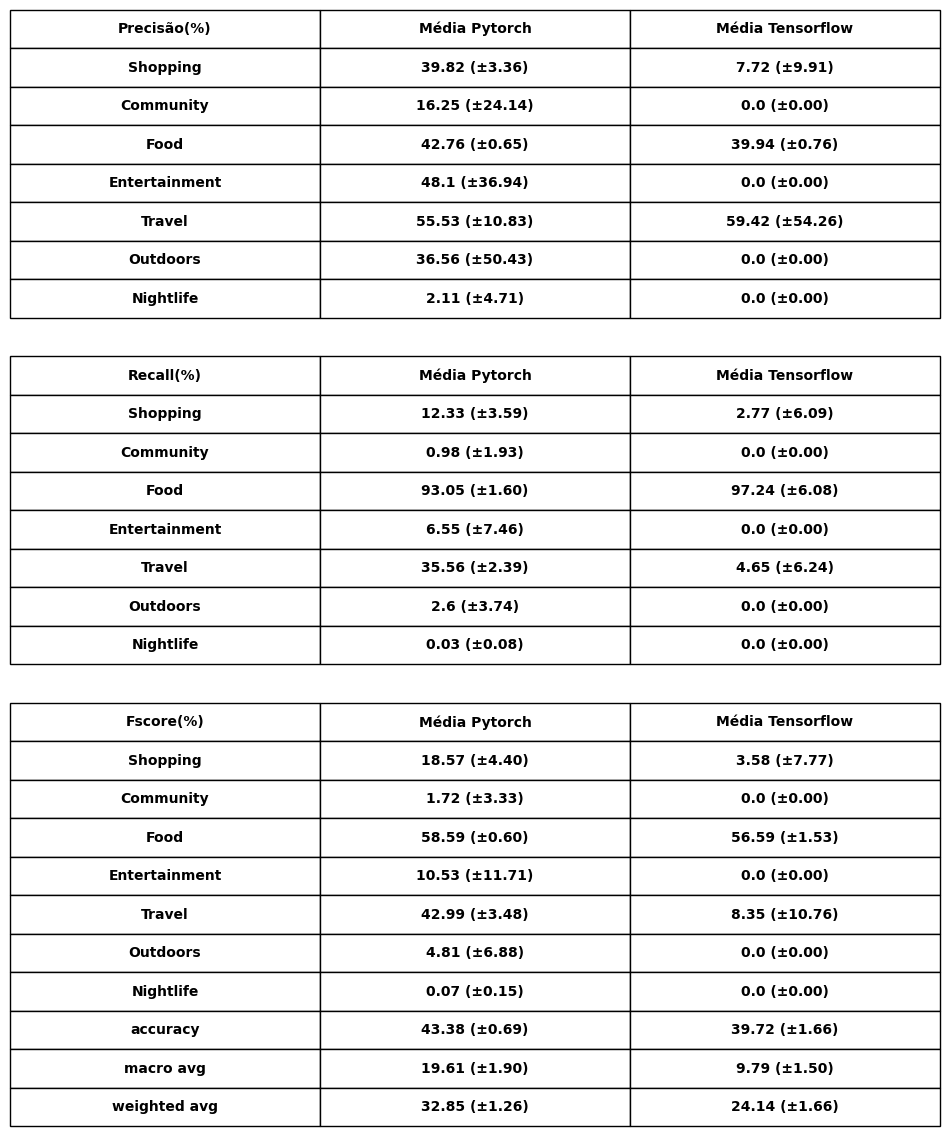

In [16]:
comparar_tabelas("Arizona/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Arizona/Tensorflow/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/precision.csv","Precisão","Arizona/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Arizona/Tensorflow/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/recall.csv","Recall","Arizona/Sem_Preprocess_Norm/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Arizona/Tensorflow/output/poi_categorization_job/base/not_directed/gowalla/US/AL/7_categories/5_folds/1_replications/fscore.csv","Fscore")